In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.graphics.gofplots import qqplot


In [3]:
# Load the datasets
train_data = pd.read_csv('/home/brandon-ism/Documents/data/m444/who_life/life-expectancy-who/who_train.csv')
test_data = pd.read_csv('/home/brandon-ism/Documents/data/m444/who_life/life-expectancy-who/who_test.csv')

# Clean column names to remove whitespace
train_data.columns = train_data.columns.str.strip()
test_data.columns = test_data.columns.str.strip()

In [10]:
# Align train and test features
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

# Ensure all data is numeric and handle the boolean columns
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
y_train = pd.to_numeric(y_train, errors='coerce').fillna(0).astype(float)
y_test = pd.to_numeric(y_test, errors='coerce').fillna(0).astype(float)

# Fit baseline linear regression model
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

# Diagnostics
print(model.summary())

# `const` = beta_0



                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     38.40
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           2.85e-50
Time:                        19:04:21   Log-Likelihood:                -496.51
No. Observations:                 183   AIC:                             1033.
Df Residuals:                     163   BIC:                             1097.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [11]:

# Predictions and residuals
X_test = sm.add_constant(X_test, has_constant='add')
y_pred = model.predict(X_test)
residuals = model.resid

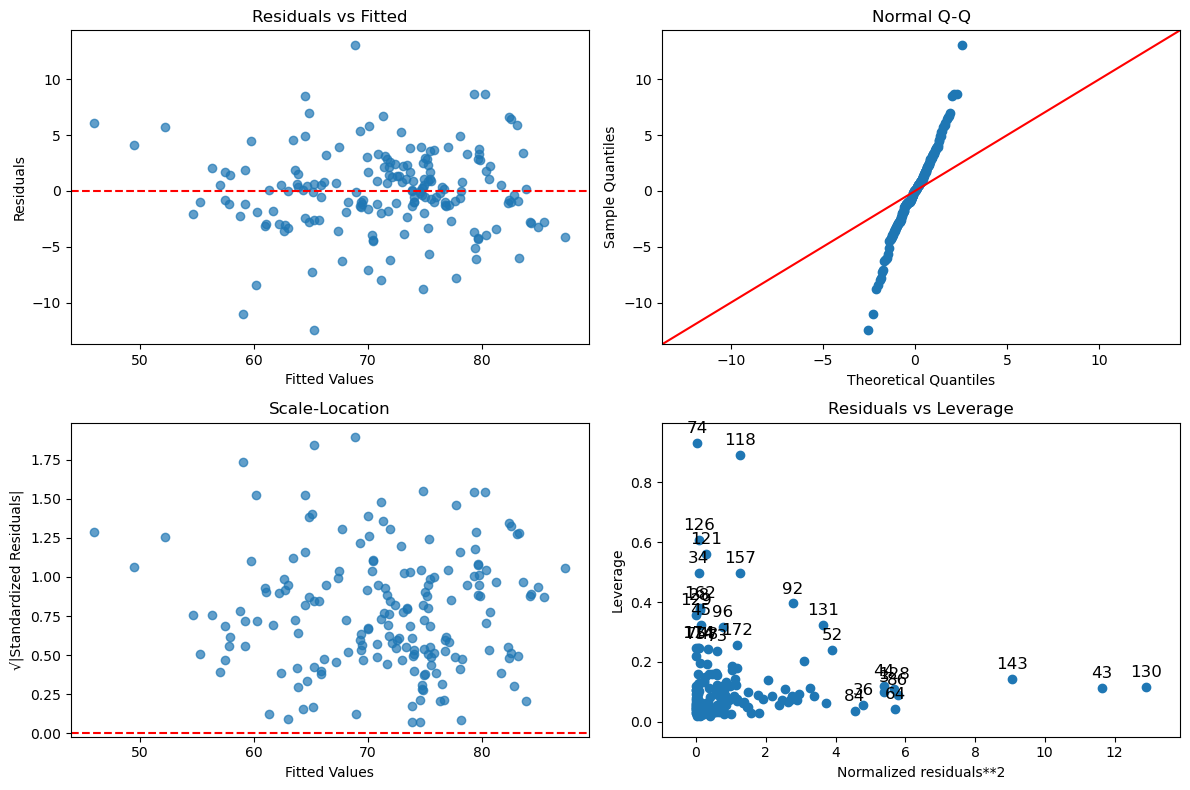

In [12]:

# Diagnostic Plots
plt.figure(figsize=(12, 8))


# Residuals vs Fitted
plt.subplot(2, 2, 1)
plt.scatter(model.fittedvalues, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')


# Normal Q-Q Plot
plt.subplot(2, 2, 2)
qqplot(residuals, line='45', ax=plt.gca())
plt.title('Normal Q-Q')


# Scale-Location Plot
plt.subplot(2, 2, 3)
standardized_residuals = residuals / np.std(residuals)
plt.scatter(model.fittedvalues, np.sqrt(np.abs(standardized_residuals)), alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Scale-Location')
plt.xlabel('Fitted Values')
plt.ylabel('√|Standardized Residuals|')


# Residuals vs Leverage
plt.subplot(2, 2, 4)
plot_leverage_resid2(model, ax=plt.gca())
plt.title('Residuals vs Leverage')

plt.tight_layout()
plt.show()